# Spatial Interpolation: Kriging

- non-deterministic interpolation
- measures of uncertainty

In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 9)


In [2]:
import rasterio

In [3]:
from rasterio.mask import mask
import geopandas as gpd
import fiona
import pandas as pd
import pykrige

In [4]:
precip = gpd.read_file("precip_sd.geojson")


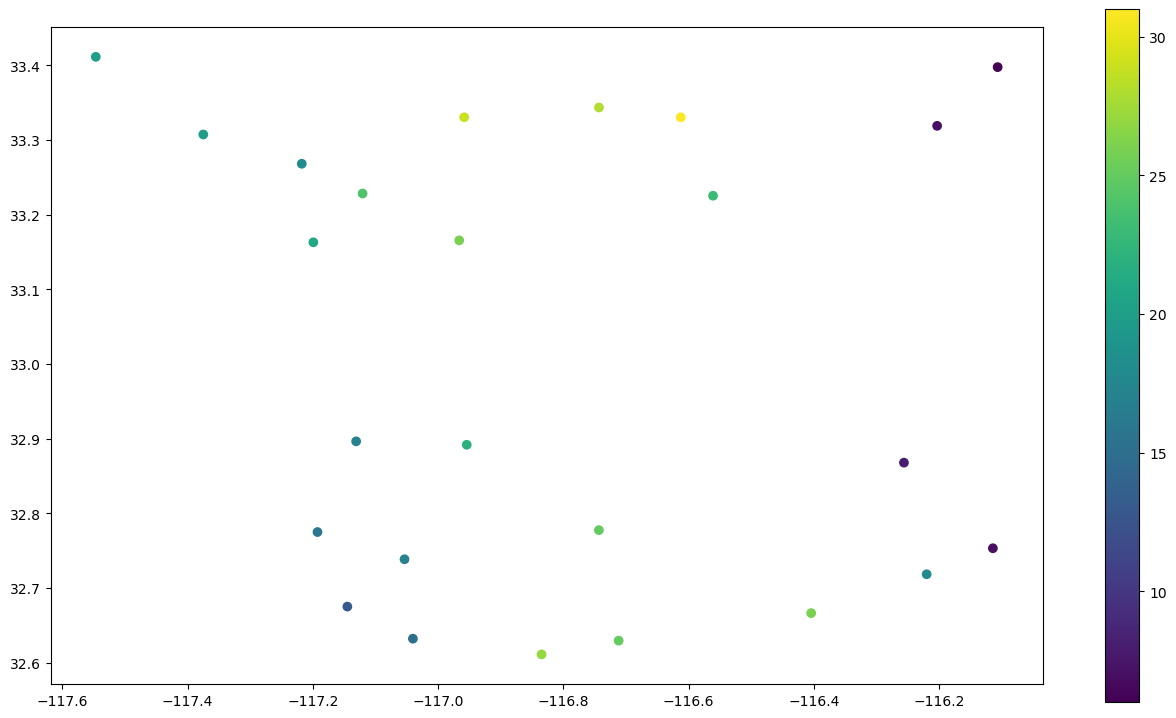

In [5]:
precip.plot(column='inches', legend=True);

In [6]:
county = gpd.read_file("sdcounty.geojson")

In [7]:
m = county.explore()
precip.explore(column='inches', m=m)


### Interpolate to Grids


In [8]:
import tobler

In [9]:
county_utm = county.to_crs(county.estimate_utm_crs())
precip_utm = precip.to_crs(precip.estimate_utm_crs())

In [10]:
from tobler.util import h3fy


In [11]:
county_h3 = h3fy(county_utm)

/home/serge/miniforge3/envs/385f23/lib/python3.11/site-packages/pyproj/crs/crs.py:1293: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


<Axes: >

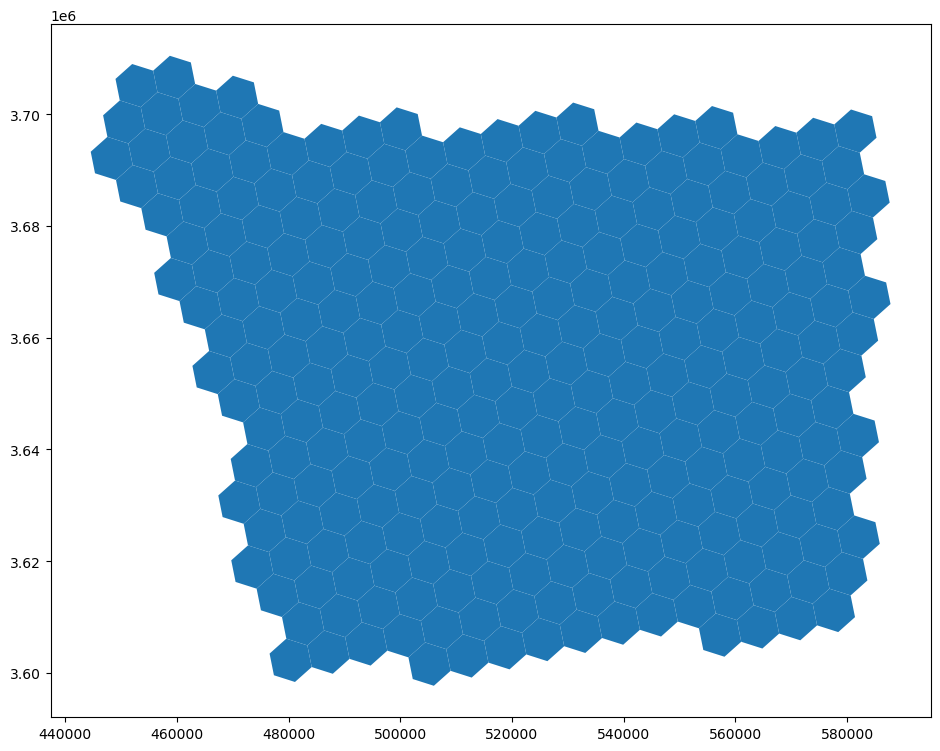

In [12]:
county_h3.plot()

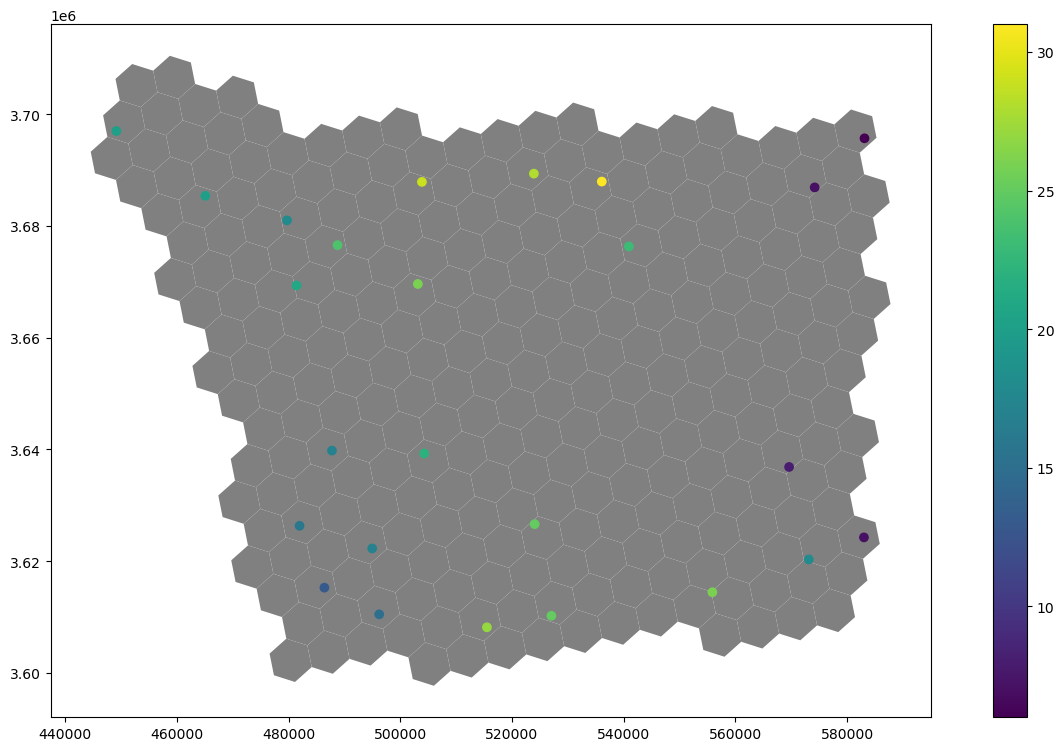

In [13]:
m = county_h3.plot(color='grey')
precip_utm.plot(column='inches', ax=m, legend=True);

In [14]:
county_h3.shape

(283, 1)

In [15]:
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging
import numpy

data = numpy.array(
    [
        [0.3, 1.2, 0.47],
        [1.9, 0.6, 0.56],
        [1.1, 3.2, 0.74],
        [3.3, 4.4, 1.47],
        [4.7, 3.8, 1.74],
    ]
)

gridx = numpy.arange(0.0, 5.5, 0.5)
gridy = numpy.arange(0.0, 5.5, 0.5)

In [16]:
OK = OrdinaryKriging(
    data[:, 0],
    data[:, 1],
    data[:, 2],
    variogram_model="linear",
    verbose=False,
    enable_plotting=False,
)


In [17]:
z, ss = OK.execute("grid", gridx, gridy)


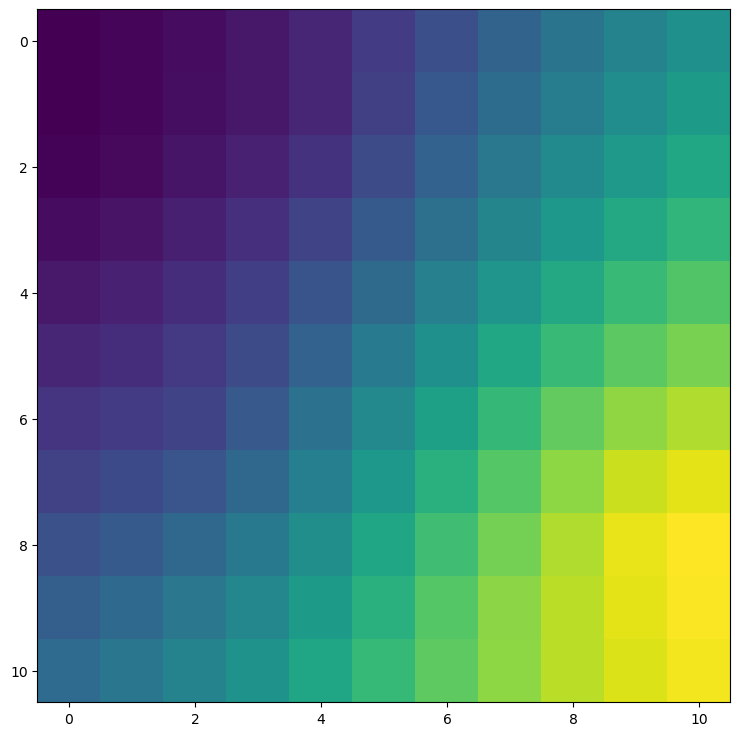

In [18]:
kt.write_asc_grid(gridx, gridy, z, filename="output.asc")
plt.imshow(z)
plt.show()

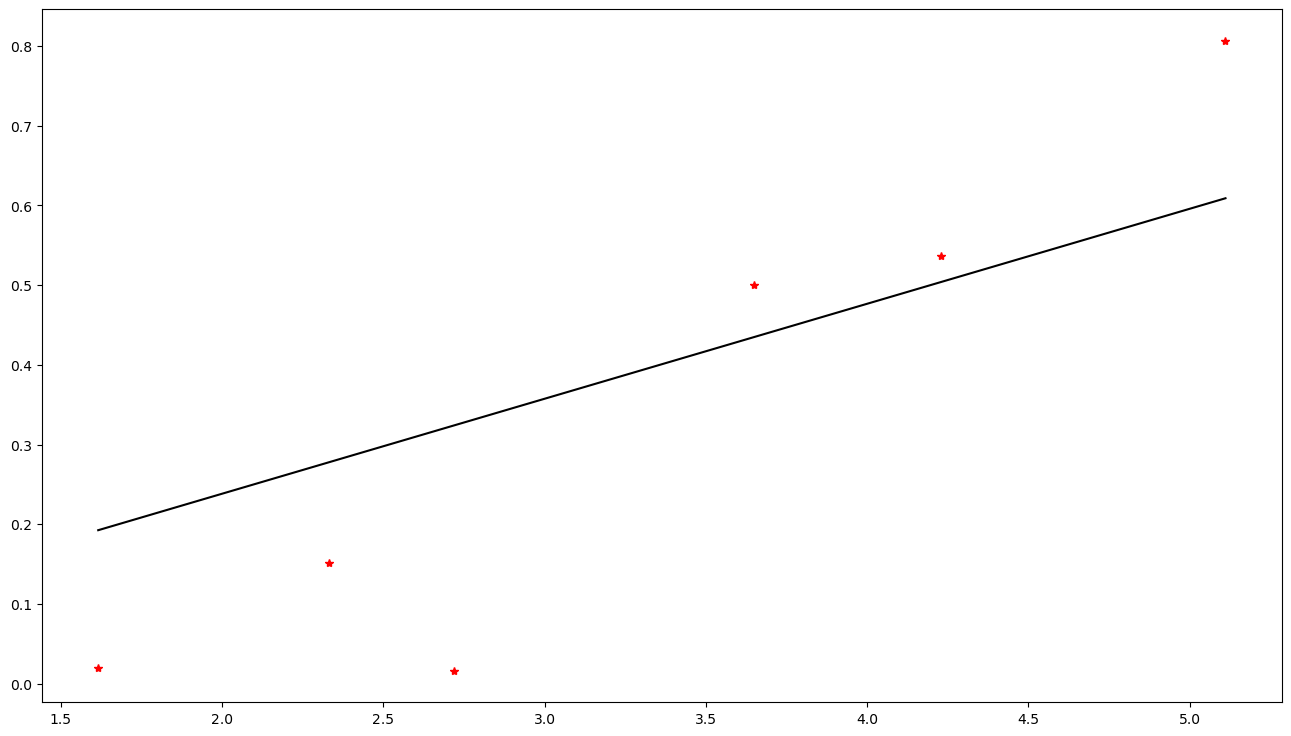

In [19]:
OK.display_variogram_model()

In [20]:
# on our data

In [21]:
# need data as an array x, y, z
xy = precip_utm.get_coordinates().values
xy

array([[ 583004.47841394, 3624260.76401225],
       [ 488756.17186611, 3676592.04898247],
       [ 449160.53488767, 3697018.72174121],
       [ 503139.91081969, 3669633.31762554],
       [ 515500.16753874, 3608165.77137673],
       [ 503866.14871561, 3687910.12460877],
       [ 496220.3128192 , 3610487.50087195],
       [ 465085.36771663, 3685415.96172379],
       [ 555871.76536934, 3614440.98214788],
       [ 481952.94253474, 3626336.73447979],
       [ 536065.45868173, 3687970.53671251],
       [ 523907.41995088, 3689388.07080752],
       [ 573124.95970497, 3620322.35900784],
       [ 574184.55561885, 3686922.32555816],
       [ 494967.63909554, 3622280.44417326],
       [ 569606.47065466, 3636870.43998023],
       [ 481414.20827779, 3669361.51804362],
       [ 486406.523116  , 3615261.87416775],
       [ 504275.11549915, 3639279.06486151],
       [ 487752.83008326, 3639797.5530545 ],
       [ 524046.51998958, 3626636.08507519],
       [ 527045.48122544, 3610231.81431574],
       [ 5

In [22]:
z = precip_utm.inches.values
z

array([ 7, 24, 20, 26, 27, 29, 15, 20, 26, 16, 31, 28, 18,  7, 17,  8, 21,
       13, 22, 17, 25, 25,  6, 18, 23])

In [23]:
z = z.reshape(-1, 1)


In [24]:
data = numpy.hstack([xy,z])

In [25]:
OK = OrdinaryKriging(
    data[:, 0],
    data[:, 1],
    data[:, 2],
    variogram_model='gaussian',
    verbose=False,
    enable_plotting=False
)

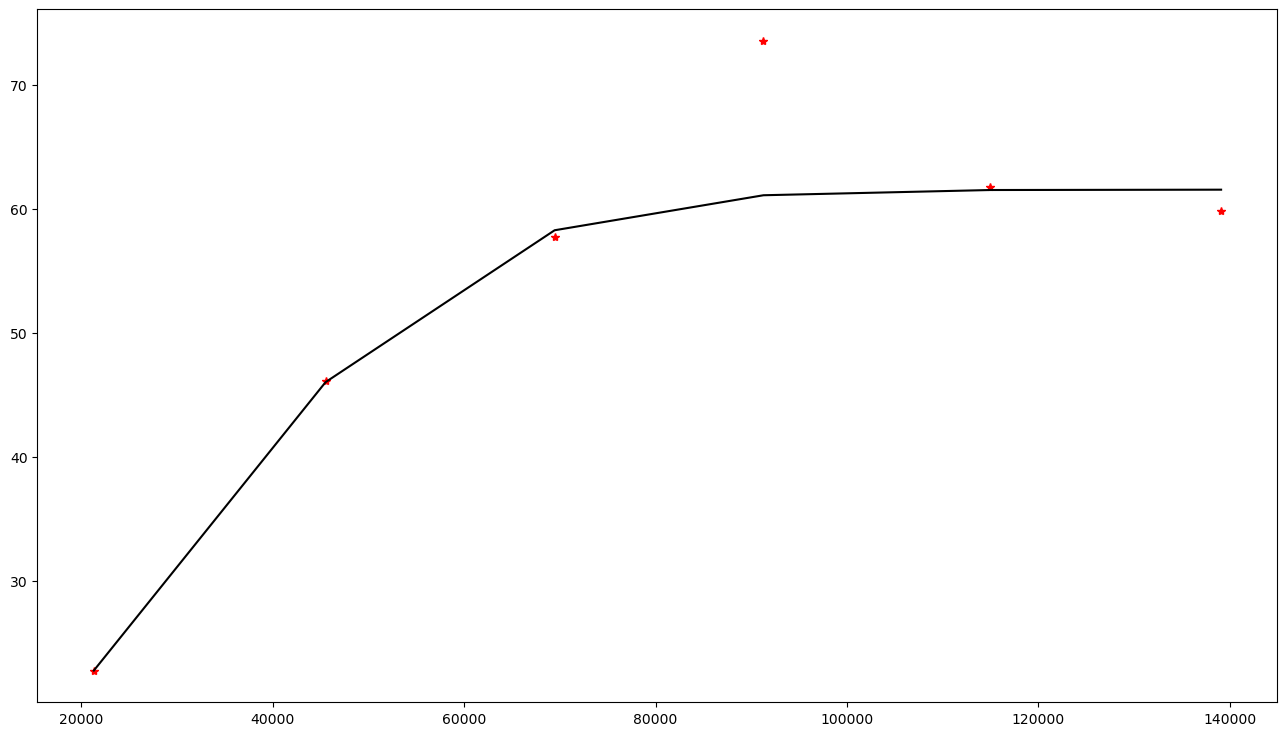

In [26]:
OK.display_variogram_model()

In [27]:
data.shape

(25, 3)

In [28]:
OK.get_variogram_points()

(array([ 21330.02835282,  45536.77201166,  69459.2012875 ,  91276.45356101,
        114966.73274876, 139076.7185656 ]),
 array([22.80904433, 46.04204212, 58.27647996, 61.09704301, 61.51850473,
        61.54597369]))

In [29]:
OK.print_statistics()

Q1 = None
Q2 = None
cR = None


In [30]:
targetxy = county_h3.centroid.get_coordinates().values
targetxy

array([[ 543166.43086289, 3676533.40671277],
       [ 464128.78440446, 3683489.40298434],
       [ 545768.57128448, 3628584.57533176],
       [ 522854.80006912, 3672105.60749547],
       [ 561414.11876934, 3656259.8466624 ],
       [ 540951.4197815 , 3669992.23386757],
       [ 524949.68001172, 3696772.07366292],
       [ 543423.04960131, 3640213.43774119],
       [ 543037.75451731, 3694670.91363073],
       [ 577192.40145761, 3665760.2561693 ],
       [ 498121.48646279, 3654605.02316659],
       [ 506990.96781518, 3680752.07684591],
       [ 484700.11392318, 3633510.60881323],
       [ 497902.48207508, 3690865.01837731],
       [ 556849.33069121, 3661331.49043028],
       [ 489139.06317909, 3646592.89206442],
       [ 473495.75465651, 3618954.2345554 ],
       [ 511883.76059216, 3621226.71959902],
       [ 527772.76721403, 3612535.65297123],
       [ 568195.5947636 , 3657735.46891642],
       [ 536770.49833912, 3620559.8680068 ],
       [ 507217.60265329, 3644468.15567276],
       [ 5

In [31]:
z, ss = OK.execute('points', targetxy[:,0], targetxy[:,1])

In [32]:
z

masked_array(data=[22.70997252120134, 19.19296656172055,
                   22.671175946345855, 28.058228962358,
                   11.250455926069673, 22.7837418981496,
                   28.802187036888235, 20.914921040821405,
                   24.098577458121575, 5.538713870335403,
                   22.318873836712683, 27.797267458718125,
                   16.163689263793977, 25.681877249264808,
                   13.658356621979925, 19.001702812947105,
                   13.482248979935228, 22.360905632919263,
                   26.39087564551578, 8.220452439239603,
                   26.00433165528513, 22.686000688983608,
                   13.014403421285815, 19.525332465730408,
                   4.6038223388996755, 19.786029280357457,
                   13.325453362607869, 18.91872907865335,
                   29.39302669901664, 25.84122458070605,
                   17.70377638841096, 18.02946122241701,
                   24.494706637142095, 20.59319169624504,
              

In [33]:
z.data.shape

(283,)

In [34]:
targetxy.shape

(283, 2)

In [35]:
county_h3['ok_est'] = z.data

<Axes: >

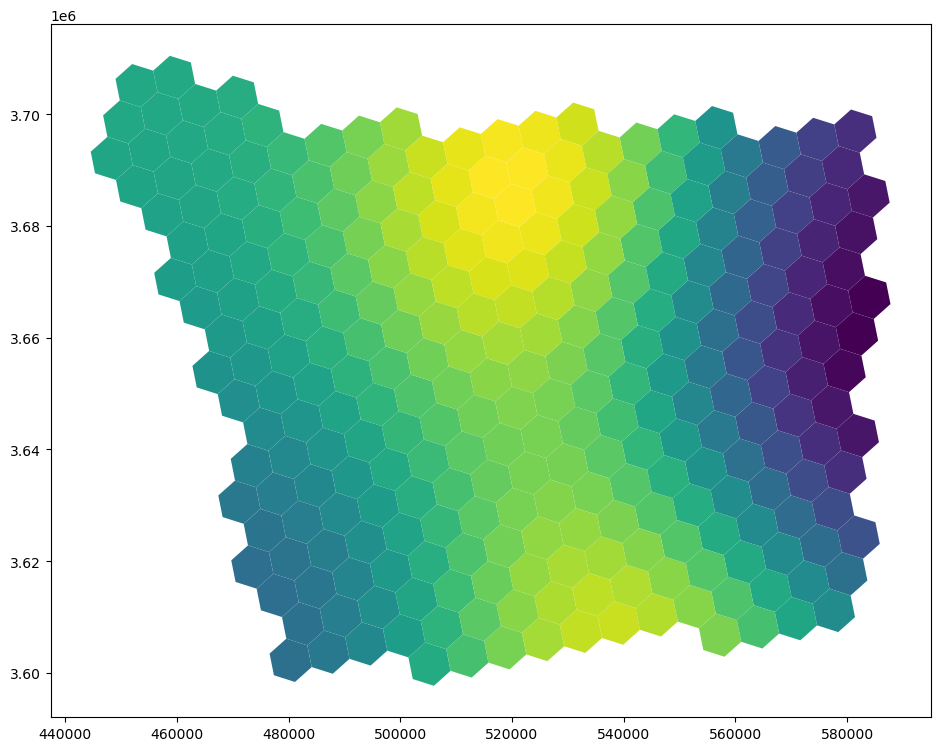

In [36]:
county_h3.plot(column='ok_est')

### Nearest neighbor

In [37]:
hcents = county_h3.centroid


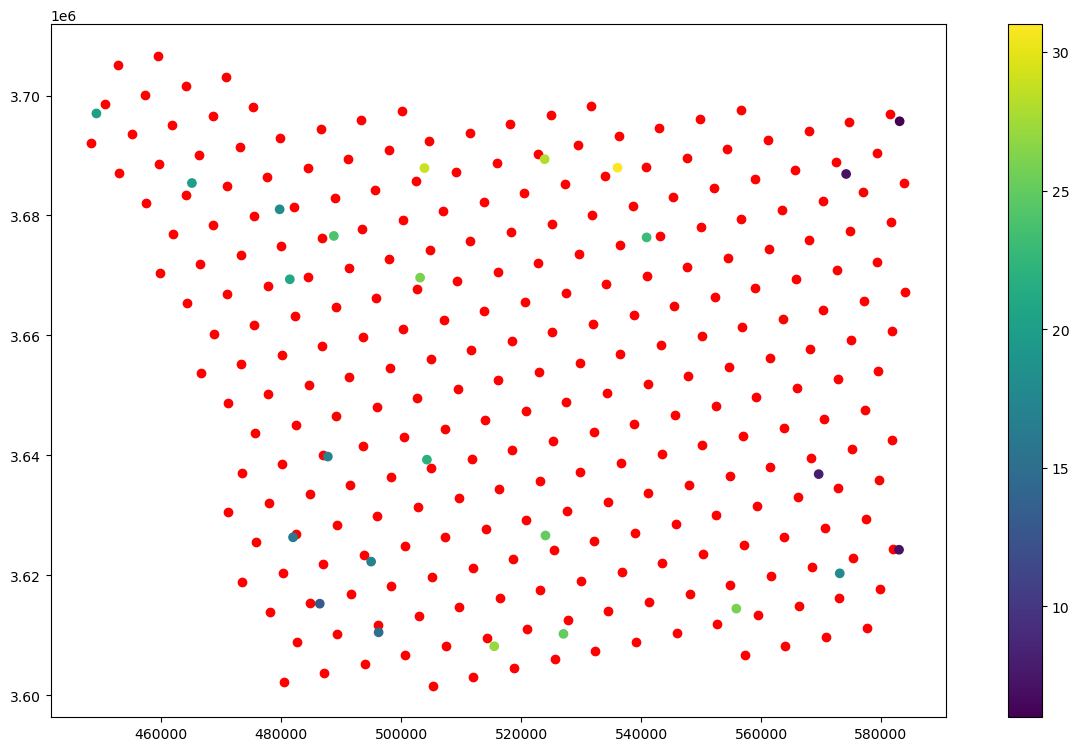

In [38]:
m = hcents.plot(color='r')
precip_utm.plot(column='inches', ax=m, legend=True);

In [39]:
gpd.sjoin_nearest(county_h3, precip_utm, distance_col="distances",
    lsuffix="left", rsuffix="right", exclusive=True)

,geometry,ok_est,index_right,inches,distances
hex_id,,,,,
8629a6b1fffffff,"POLYGON ((543947.332 3672665.101, 546943.538 3...",22.709973,24,23,0.000000
8629a6b07ffffff,"POLYGON ((541732.140 3666122.858, 544728.661 3...",22.783742,24,23,2593.252609
8629a6847ffffff,"POLYGON ((557632.097 3657459.099, 560630.327 3...",13.658357,24,23,18402.001342
8629a685fffffff,"POLYGON ((559846.953 3664005.787, 562844.864 3...",13.014403,24,23,16105.496841
8629a44f7ffffff,"POLYGON ((530526.103 3651560.435, 533522.862 3...",24.494707,24,23,19987.541201
...,...,...,...,...,...
8629a419fffffff,"POLYGON ((496787.726 3626035.487, 499783.743 3...",18.174665,14,17,4130.327123
8629a4197ffffff,"POLYGON ((501337.259 3620959.074, 504333.947 3...",18.999794,14,17,2522.440297
8629a4187ffffff,"POLYGON ((494567.822 3619489.018, 497564.096 3...",16.934011,14,17,0.000000


In [40]:
county_h3.shape

(283, 2)

In [41]:
county_h3['nn1_est'] = gpd.sjoin_nearest(county_h3, precip_utm, distance_col="distances",
    lsuffix="left", rsuffix="right", exclusive=True).inches

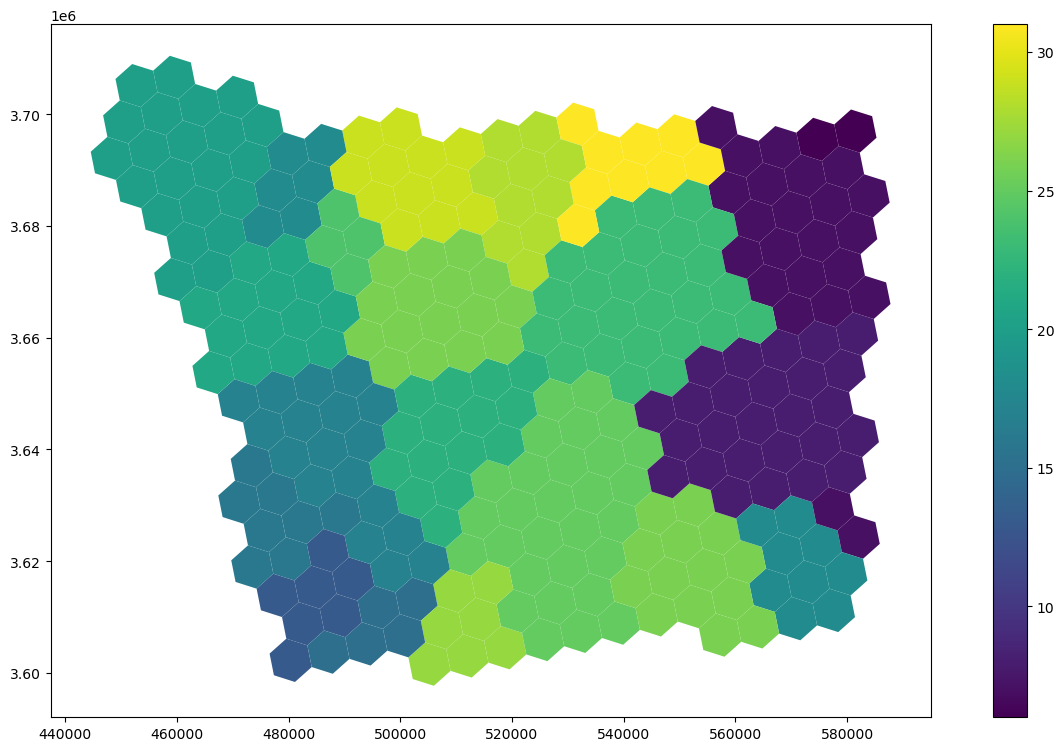

In [42]:
county_h3.plot(column='nn1_est', legend=True);

### Knn5

In [43]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X, y)
print(neigh.predict([[1.5]]))



[0.5]


In [44]:
# Set number of neighbors to use
neighbors = 5

# Initialize KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors = neighbors, weights = "uniform") # no distance decay distance

# Fit to observed locations
knn_regressor.fit(precip_utm.get_coordinates(), precip_utm.inches)

KNeighborsRegressor()

In [45]:
knn_regressor.predict(hcents.get_coordinates())


array([23. , 20.6, 20.4, 27.4, 12.6, 23. , 27.4, 20.4, 23.6, 10.2, 22. ,
       25. , 17. , 25. , 15. , 18.6, 15.6, 21.8, 23.6, 12.6, 24.2, 21.4,
       15. , 16.8,  9.2, 16.8, 16.8, 20. , 27.4, 25. , 17. , 20. , 25.4,
       20.6, 21.8, 19. , 19. , 21.2, 19.4, 15. , 20. , 24.8, 17.6, 21.8,
       27.4, 21.8, 22. , 19. , 23.6, 19.4, 22.6, 21.8, 16.8, 16.8, 22.4,
       27.4, 22.2, 20.6, 20.6, 20.4, 20. , 15. , 17. , 20.6, 23.2, 19.4,
       20.6, 25. , 15.6, 20.4, 16.8, 15.6, 20.6, 19. , 27.4, 21.2, 27.4,
       22. , 20.6, 23.6, 25. , 20.6, 23.6, 21.8, 26. , 15.6, 10.2, 19. ,
       21.8, 19.4, 19. , 21.8, 23.6, 27.4, 16.8, 21.2, 27.6, 23.2, 17.6,
       19.4, 24.2, 17.6, 21.2, 23.6, 21.8, 15. , 13.2, 20.6, 15.6, 27.4,
       25.6, 20.6, 16.8, 19.2, 16.8, 23.2, 20.6, 18.6, 27.4, 16.8, 20.6,
       21.8, 19.2, 16.8, 18.4, 22.6, 23.6, 19. , 18.8, 13.2, 22. , 19.4,
       23.6, 19.4, 15.6, 20.6, 15. , 17.6, 15.6, 19. , 19. , 23. , 20.6,
       20.6, 21.2, 27.4, 19.4, 16.8, 21.8, 27.4, 17

In [46]:
county_h3['nn5_est'] = knn_regressor.predict(hcents.get_coordinates())


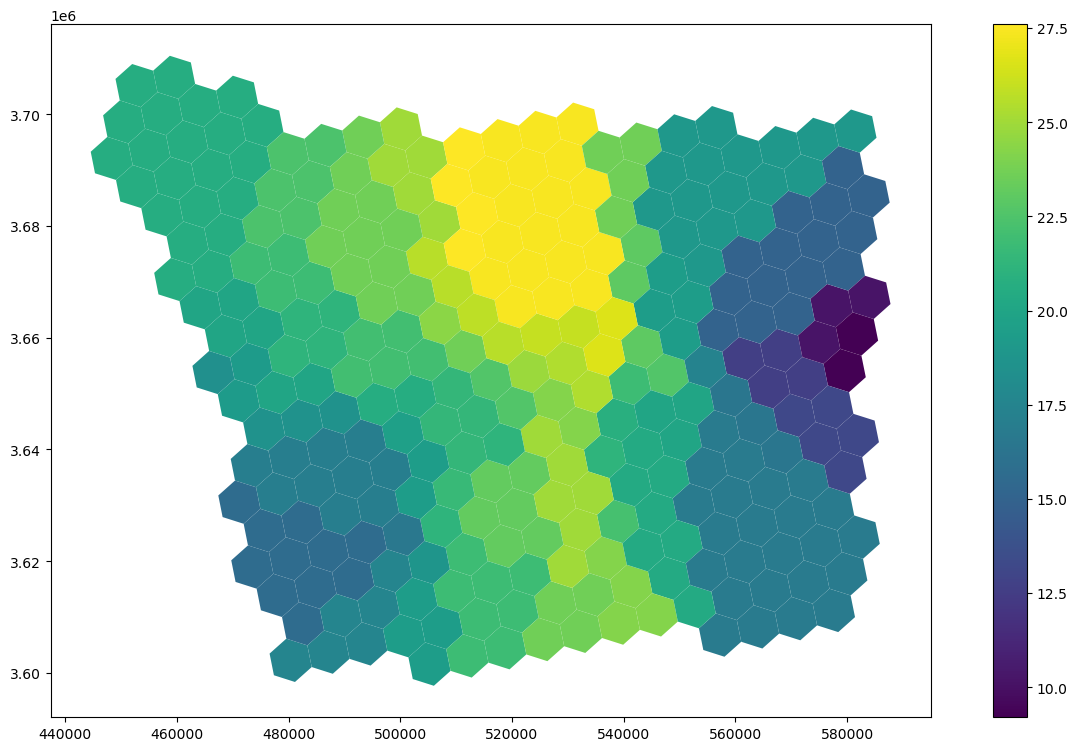

In [47]:
county_h3.plot(column='nn5_est', legend=True);

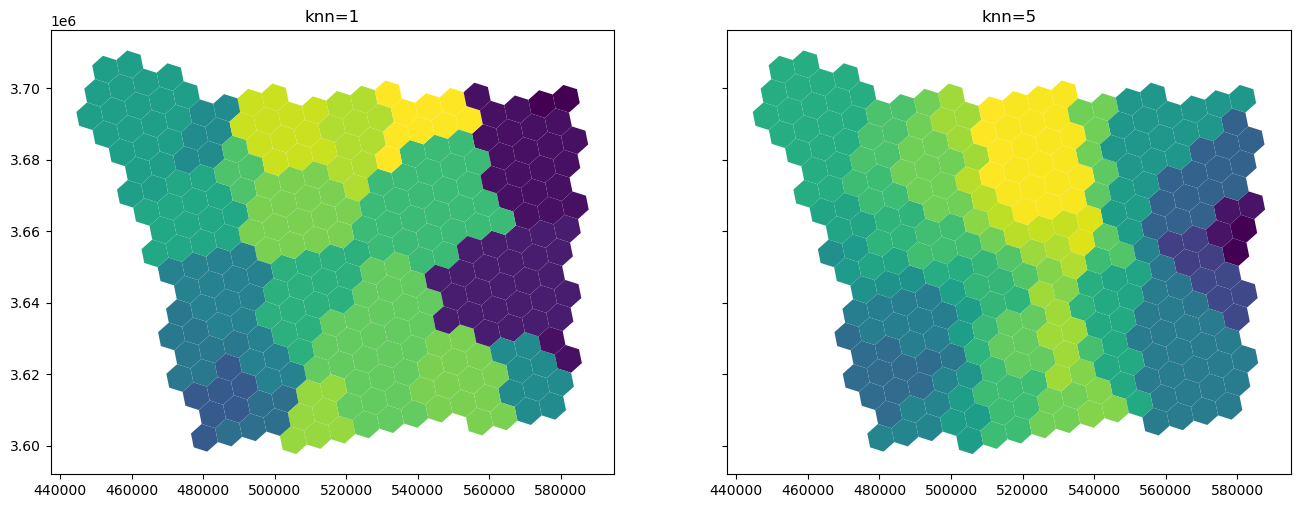

In [48]:
import matplotlib.pyplot as plt
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
county_h3.plot(column='nn1_est',ax=ax1)
county_h3.plot(column='nn5_est',ax=ax2)
ax1.set_title("knn=1")
ax2.set_title("knn=5");



In [49]:
# Set number of neighbors to use
neighbors = 5

# Initialize KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors = neighbors, weights = "distance") # inverse distance weighting
# Fit to observed locations
knn_regressor.fit(precip_utm.get_coordinates(), precip_utm.inches)

KNeighborsRegressor(weights='distance')

In [50]:
county_h3['nn5id_est'] = knn_regressor.predict(hcents.get_coordinates())


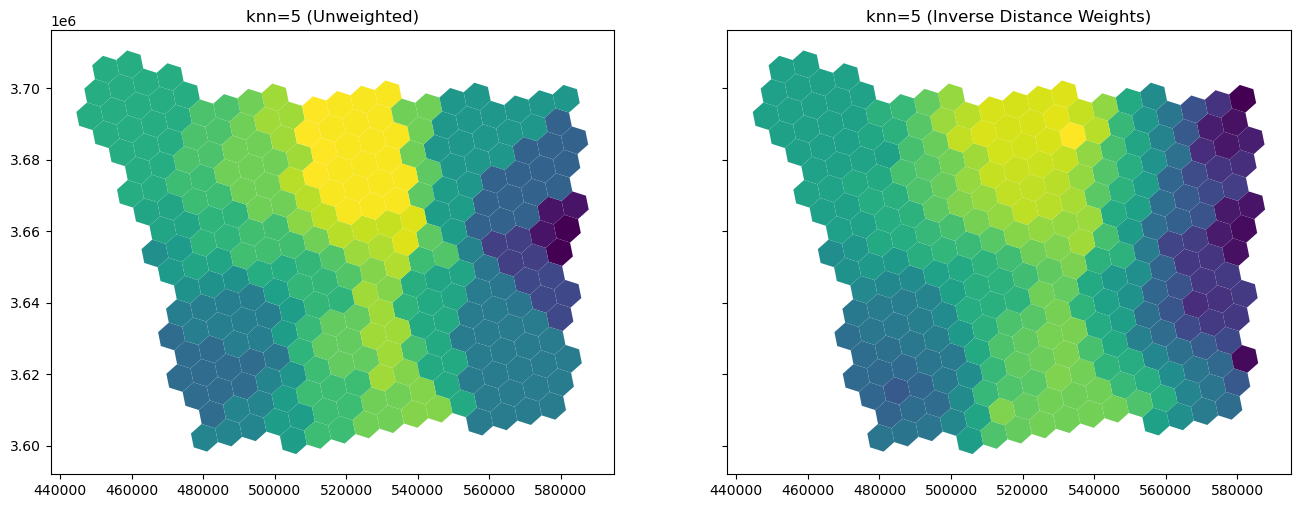

In [51]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
county_h3.plot(column='nn5_est',ax=ax1)
county_h3.plot(column='nn5id_est',ax=ax2)
ax1.set_title("knn=5 (Unweighted)")
ax2.set_title("knn=5 (Inverse Distance Weights)");


## Fit

In [52]:
h3_cents = county_h3.centroid
import rioxarray
import rasterio

In [53]:
# get observed values for all grid cells


clipped = rasterio.open("clipped_example.tif")

In [54]:
clipped.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 527,
 'height': 336,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.002913805220117985, 0.0, -117.61397387622179,
        0.0, -0.0029142217548938525, 33.50612487372884)}

In [55]:
h3_cents_4326 = h3_cents.to_crs(clipped.meta['crs'])
cp = h3_cents_4326
coord_list = [(x, y) for x, y in zip(cp.x, cp.y)]


In [56]:
observations = [x[0] for x in clipped.sample(coord_list)]
county_h3['inches'] = observations

<Axes: >

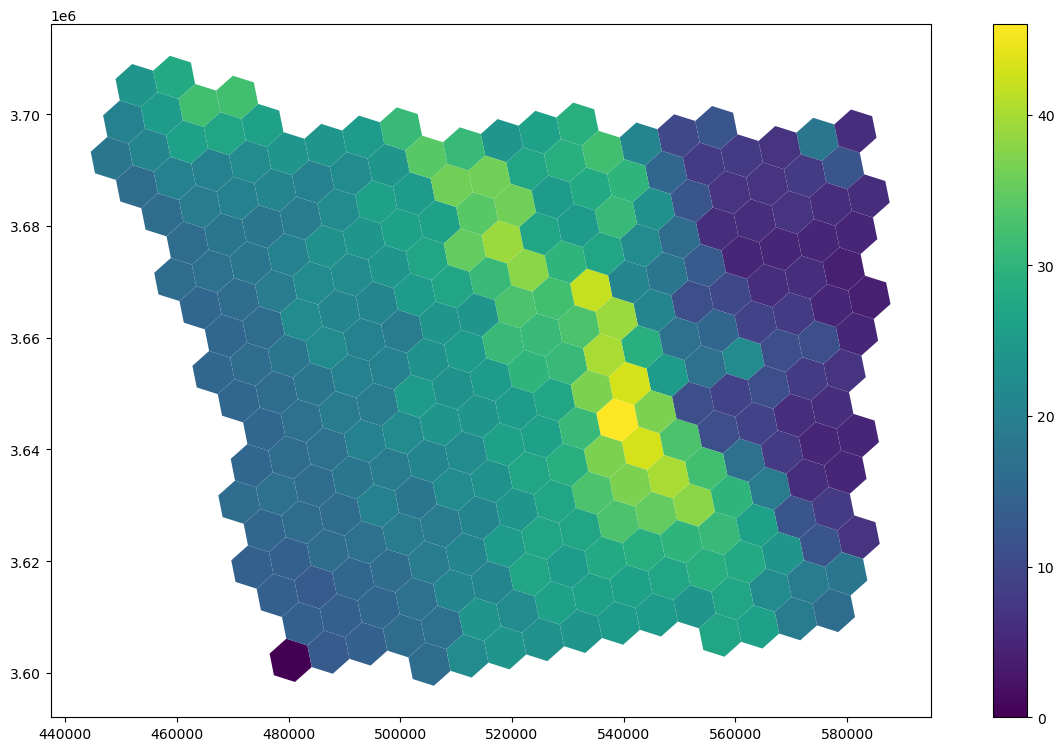

In [57]:
county_h3.plot(column='inches', legend=True)

In [58]:
# calculate fit for each approach (MAPE)
def mape(est, obs):
    err = est-obs
    aerr = numpy.abs(err)
    den = obs + (obs == 0)
    paerr = aerr / den
    paerr *= 100
    return paerr.mean()

In [59]:
mape(county_h3.nn1_est, county_h3.inches)

27.99203089869245

In [60]:
mape(county_h3.nn5_est, county_h3.inches)

40.242887541921576

In [61]:
mape(county_h3.nn5id_est, county_h3.inches)

33.161102090343014

In [62]:
mape(county_h3.ok_est, county_h3.inches)

23.964144515966048

In [63]:
# plot fit


In [64]:
# map errors for different models

<Axes: >

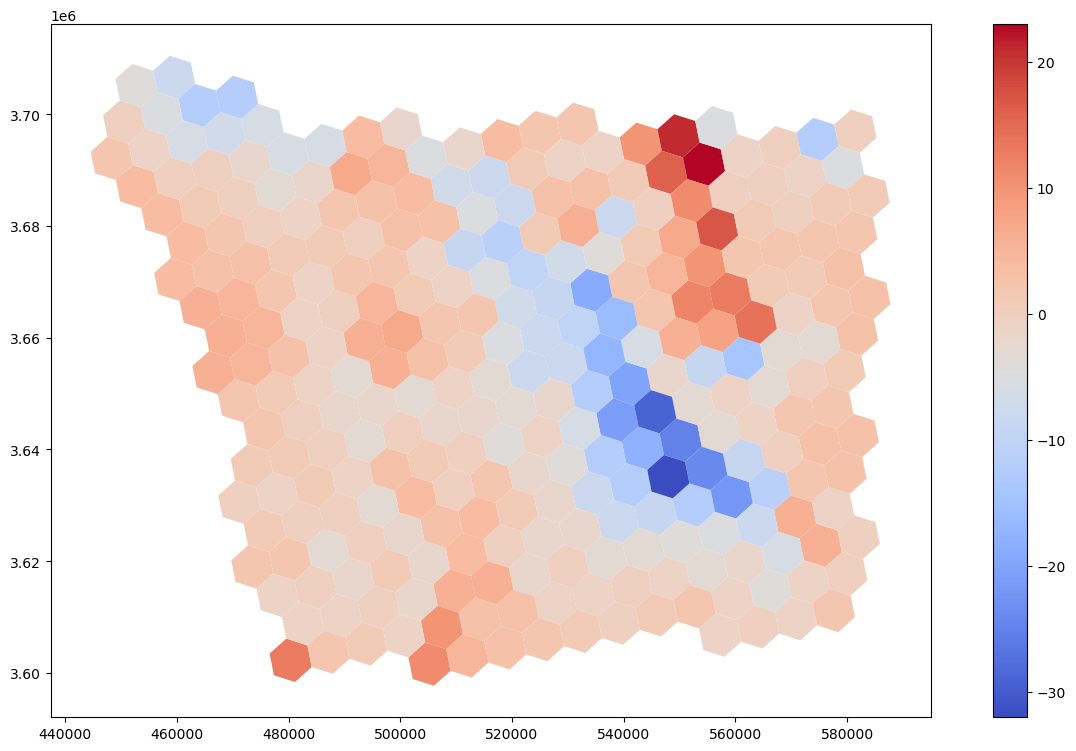

In [65]:
en1 = county_h3.nn1_est - county_h3.inches

county_h3['nn1_error'] = en1

county_h3.plot(column='nn1_error', legend=True, cmap='coolwarm')

<Axes: >

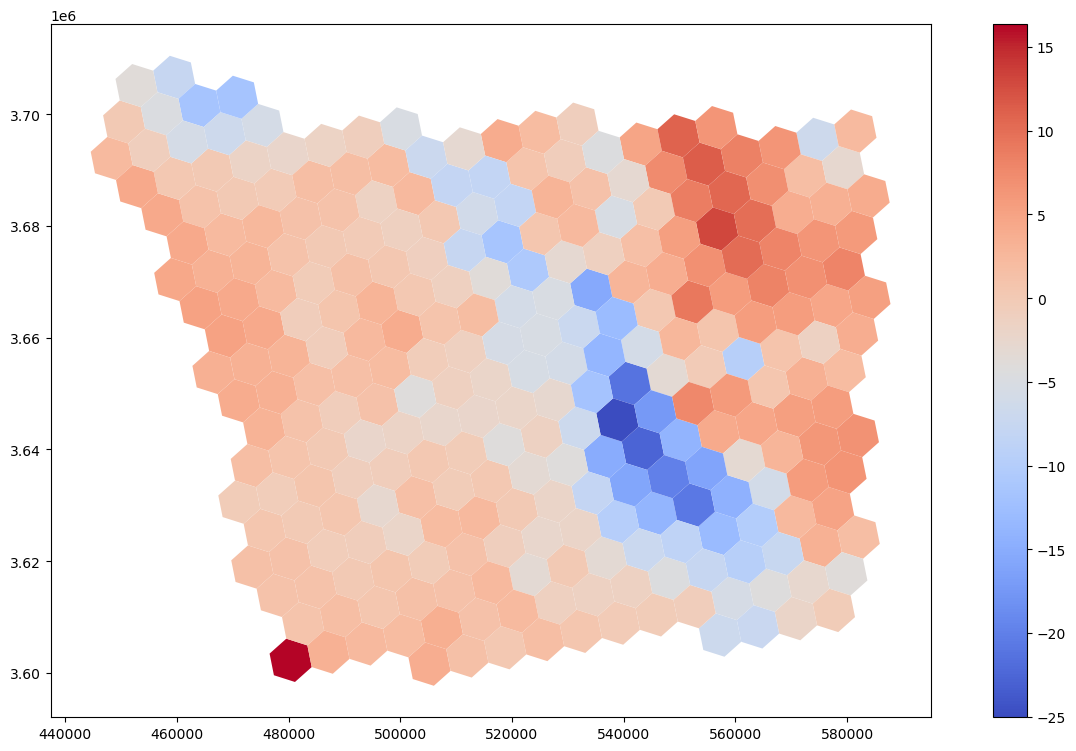

In [66]:
en5id = county_h3.nn5id_est - county_h3.inches

county_h3['nn5id_error'] = en5id

county_h3.plot(column='nn5id_error', legend=True, cmap='coolwarm')

In [67]:
import seaborn as sns

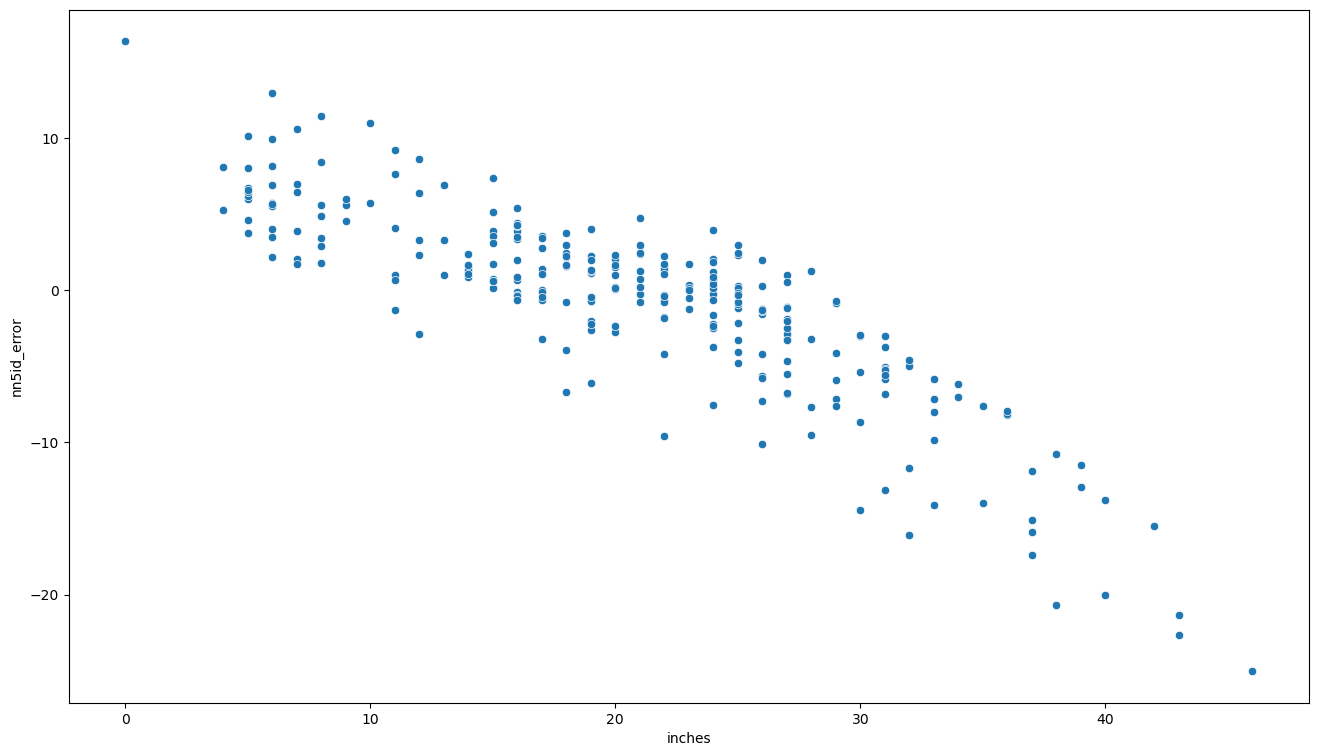

In [68]:
sns.scatterplot(x=county_h3.inches, y=county_h3.nn5id_error);